In [1]:
import arcpy
from osgeo import gdal
import geopandas,numpy,pandas
from scipy import stats

d:\workspace\ArcGIS\Pro\bin\Python\envs\ProDev\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
shp = "./cngdp2000_2021.shp"

In [13]:
df = geopandas.read_file(shp)

In [16]:
df2 = df.dropna()

In [ ]:
df2["mean"]= df2.apply(lambda row:)

d:\workspace\ArcGIS\Pro\bin\Python\envs\ProDev\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

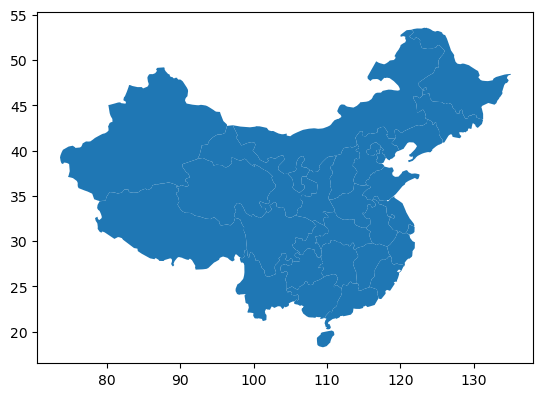

In [34]:
df2.plot()

In [17]:
u = df2['GDP2004'].mean()  
std = df2['GDP2004'].std()
stats.kstest(df2['GDP2004'], 'norm', (u, std))

KstestResult(statistic=0.17356015508992806, pvalue=0.27466627475124084)

<AxesSubplot:>

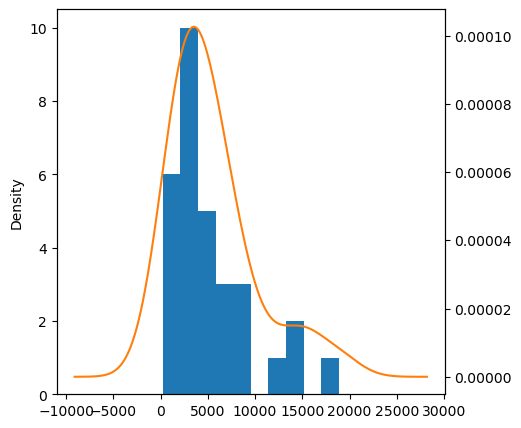

In [18]:
fig,ax = plt.subplots(figsize=(5,5))
df2["GDP2004"].hist(ax=ax)
df2["GDP2004"].plot(kind = 'kde', secondary_y=True,ax = ax)

In [19]:
year,pv = [],[]
for i in range(2000,2019):
    f = f"GDP{i}"
    u = df2[f].mean()  
    std = df2[f].std()
    ks = stats.kstest(df2[f], 'norm', (u, std))
    print(i,ks.pvalue)
    year.append(i)
    pv.append(ks.pvalue)

2000 0.21686091530037788
2001 0.22429651582514565
2002 0.2269317580531538
2003 0.21121173837464846
2004 0.27466627475124084
2005 0.27863620979068393
2006 0.2840587720617824
2007 0.31790976171186924
2008 0.27267060012683286
2009 0.30516659325656637
2010 0.3135762827080202
2011 0.3919982647963909
2012 0.5200764013212809
2013 0.4924626951909459
2014 0.28781644341847057
2015 0.16770723553166422
2016 0.1953798599292954
2017 0.2940139617678682
2018 0.3639188175877538


In [20]:
plt.scatter(x=year,y=pv)
plt.axhline(y=0.05,c="r",linestyle="--")
plt.axhline(y=0.1,c="y",linestyle="--")
plt.text(x=2000,y=0.053,s="p=0.05")
plt.text(x=2000,y=0.103,s="p=0.1")

Text(2000, 0.103, 'p=0.1')

In [22]:
hl = arcpy.HighLowClustering_stats(shp,"GDP2000",Conceptualization_of_Spatial_Relationships="CONTIGUITY_EDGES_CORNERS")

In [23]:
print(hl.getMessages())

Start Time: 2023年1月4日 16:16:57
WARNING 001605: Distances for Geographic Coordinates (degrees, minutes, seconds) are analyzed using Chordal Distances in meters.
WARNING 000846: 2 feature(s) had no neighbors which generally invalidates the statistical properties of a test.
WARNING 000847: Features with no neighbors (only includes first 30): FID = 18, 31.

      General G Summary      
Observed General G    0.042126
Expected General G    0.030242
Variance              0.000015
z-score               3.038769
p-value               0.002375


Succeeded at 2023年1月4日 16:16:57 (Elapsed Time: 0.24 seconds)


In [29]:
year,z,p = [],[],[]
for i in range(2000,2022):
    f = f"GDP{i}"
    hl = arcpy.HighLowClustering_stats(shp,f,
    Conceptualization_of_Spatial_Relationships="CONTIGUITY_EDGES_CORNERS")
    #print(i,hl.getOutput(1)hl.getOutput(2))
    year.append(i)
    z.append(float(hl.getOutput(1)))
    p.append(float(hl.getOutput(2)))

In [30]:
df = pandas.DataFrame({"year":year,"z":z,"p":p})

In [31]:
df

year         z         p
0   2000  3.038769  0.002375
1   2001  2.893190  0.003814
2   2002  2.898278  0.003752
3   2003  2.908919  0.003627
4   2004  2.982435  0.002860
5   2005  2.967321  0.003004
6   2006  2.925886  0.003435
7   2007  2.945121  0.003228
8   2008  2.962606  0.003050
9   2009  3.014550  0.002574
10  2010  3.045547  0.002323
11  2011  3.074173  0.002111
12  2012  3.064767  0.002178
13  2013  3.053893  0.002259
14  2014  3.041232  0.002356
15  2015  3.049292  0.002294
16  2016  3.152106  0.001621
17  2017  3.116780  0.001828
18  2018  3.126271  0.001770
19  2019  3.203395  0.001358
20  2020  3.227245  0.001250
21  2021  3.244835  0.001175

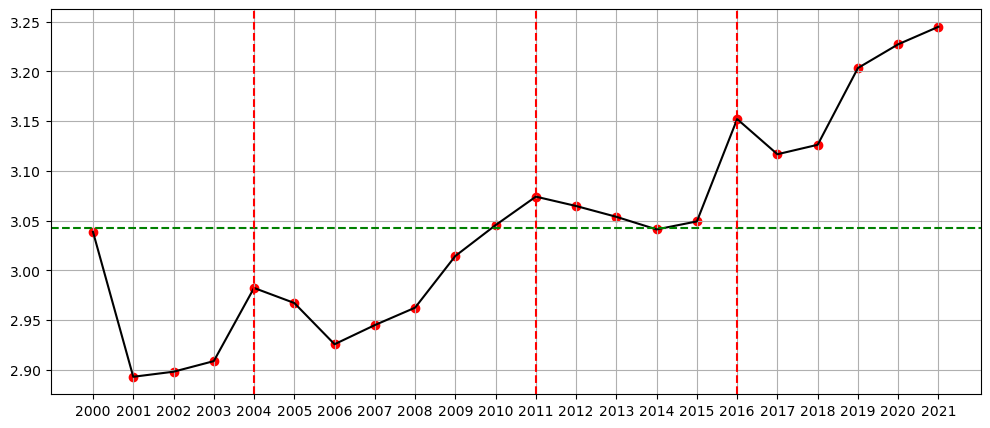

In [33]:
fig,ax = plt.subplots(figsize=(12,5))
ax.scatter(df["year"],df["z"],c="r")
ax.plot(df["year"],df["z"],linestyle="-",c="black")
ax.set_xticks(range(2000,2022))
ax.grid()
ax.axhline(y=df["z"].mean(),c="g",linestyle="--")
ax.axvline(x=[2004],c="r",linestyle="--")
#ax.axvline(x=[2009],c="b",linestyle="--")
ax.axvline(x=[2011],c="r",linestyle="--")
ax.axvline(x=[2016],c="r",linestyle="--")
pass